{'\\sf Decryption': [0.7543779203923103, 1.2201276529143965, 2.1996593860247975, 3.1484157804875808, 4.044387711881834, 5.032065224457914], '\\sf CC Task': [-0.7950695239007517, -0.8530614708784384, -0.7950695239007517, -0.8530614708784384, -0.6567668257344702, -0.12401008387111646], '\\sf Encryption': [0.4022110342248676, 1.1200663827212602, 2.0464463645215436, 2.9766969452782592, 4.144760057381198, 5.0252003011802975], '\\sf Channel Creation': [5.670460125639865, 5.669380069833289, 5.653140474024232, 5.675044822501144, 5.689684863290493, 5.657320242950425], '\\sf Data Transfer': [4.624679142257547, 4.605901896060557, 2.4520234207990463, 4.653352230289933, 5.007775153158113, 5.311755580683765]}


/tmp/ipykernel_976551/2334491134.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
/tmp/ipykernel_976551/2334491134.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)
/tmp/ipykernel_976551/2334491134.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=24)
/tmp/ipykernel_976551/2334491134.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)


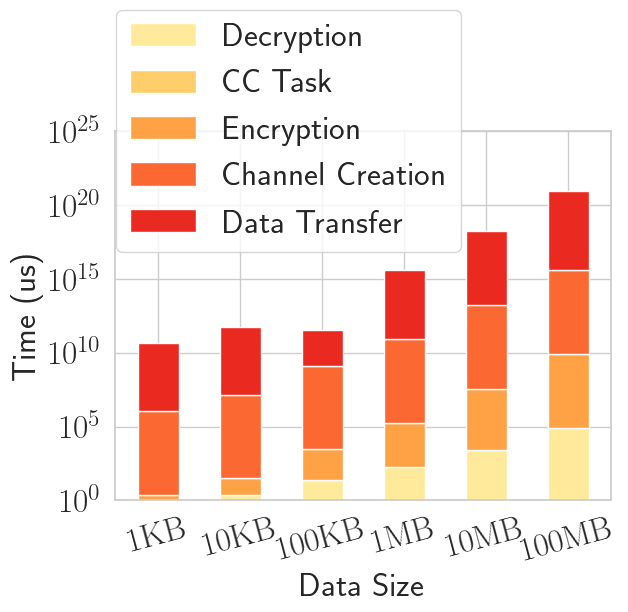

In [3]:
import numpy as np

xs = ['1KB', '10KB', '100KB', '1MB', '10MB', '100MB']
ys = []
names = ('\sf Decryption', '\sf CC Task', '\sf Encryption', '\sf Channel Creation', '\sf Data Transfer')

with open('../data/cost_sev.txt') as file:
    for line in file:
        if 'by' in line:
            ys.append([])
            breakup = line.split("by",1)[1].replace('}', '').replace('{', '').split(', ')
            for data in breakup:
                # ms
                data = float(data.split(': ')[1])
                ys[-1].append(np.log10(data))
d = {}

for i in range(len(names)):
    d[names[i]] = []
    for j in range(len(ys)):
       d[names[i]].append(ys[j][i])
print(d)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
sns.set_palette("YlOrRd")

plt.rcParams['mathtext.default'] = 'sf'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rc('legend',fontsize=24)

fig, ax = plt.subplots()
bottom = np.zeros(6)
for k, v in d.items():
    p = ax.bar(xs, v, 0.5, label=k, bottom=bottom)
    bottom += v

ax.set_xlabel('\sf Data Size')
ax.set_ylabel('\sf Time (us)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
ax.set_ylim(0, 25)
ticks = ['$10^{0}$', '$10^{5}$', '$10^{10}$', '$10^{15}$', '$10^{20}$', '$10^{25}$']
ax.set_yticklabels(ticks)
ax.legend(bbox_to_anchor=(0.35, 1), loc='center')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)
plt.savefig("./cost_breakup_sev.pdf", bbox_inches='tight')